### Initialise

In [61]:
## Import necessary packages
import numpy as np; 
import matplotlib.pyplot as plt; 
import pandas as pd; 
from sklearn.preprocessing import MinMaxScaler, scale;
from sklearn.linear_model import SGDRegressor;
from sklearn.metrics import mean_squared_error;
from sklearn.datasets import load_boston, make_regression;
from sklearn.model_selection import train_test_split,cross_val_score;
import torch;
import torch.optim as optim

import python.data as datameta

In [62]:
# Basic Initialisations
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


### Preprocess Data

In [63]:
data = datameta.processData('data/clean_data.csv'); 
data.head()

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Sugar feed rate(Fs:L/h)',
       'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)',
       'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)', 'Substrate concentration(S:g/L)',
       'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)', 'pH(pH:pH)',
       'Temperature(T:K)', 'PAA flow(Fpaa:PAA flow (L/h))',
       'Oil flow(Foil:L/hr)', 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
       'Ammonia shots(NH3_shots:kgs)',
       '0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)'],
      dtype='object') 

 (113935, 19)


,Time (h),Aeration rate(Fg:L/h),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Substrate concentration(S:g/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),pH(pH:pH),Temperature(T:K),PAA flow(Fpaa:PAA flow (L/h)),Oil flow(Foil:L/hr),Oxygen Uptake Rate(OUR:(g min^{-1})),Ammonia shots(NH3_shots:kgs),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
0,0.000000,0.181818,0.040541,0.000000,0.133858,0.006556,0.0,0.0,0.0,0.008306,1.791808e-27,0.049276,0.767126,0.258427,0.333333,0.0,0.215230,0.0,0.0
1,0.000690,0.181818,0.040541,0.000000,0.227649,0.012103,0.0,0.0,0.0,0.008715,2.763729e-05,0.049480,0.800686,0.249064,0.333333,0.0,0.162455,0.0,0.0
2,0.001380,0.181818,0.040541,0.000000,0.241342,0.006399,0.0,0.0,0.0,0.009107,2.761905e-05,0.049685,0.836653,0.243446,0.333333,0.0,0.150004,0.0,0.0
3,0.002070,0.181818,0.040541,0.000000,0.168071,0.002893,0.0,0.0,0.0,0.009492,2.760247e-05,0.049787,0.860582,0.237828,0.333333,0.0,0.148100,0.0,0.0
4,0.002761,0.181818,0.040541,0.039866,0.084036,0.000736,0.0,0.0,0.0,0.009864,2.758782e-05,0.049838,0.865835,0.234082,0.333333,0.0,0.148945,0.0,0.0


In [46]:
# Split into x and y
x_keys = [
    "Time (h)", "Aeration rate(Fg:L/h)", "Sugar feed rate(Fs:L/h)","Acid flow rate(Fa:L/h)",
    "Base flow rate(Fb:L/h)","Heating/cooling water flow rate(Fc:L/h)","Heating water flow rate(Fh:L/h)",
    "Water for injection/dilution(Fw:L/h)","Substrate concentration(S:g/L)","PAA flow(Fpaa:PAA flow (L/h))",
    "Oil flow(Foil:L/hr)", "Oxygen Uptake Rate(OUR:(g min^{-1}))", "Ammonia shots(NH3_shots:kgs)",
    # Converted variables
    "0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)",
    "Air head pressure(pressure:bar)", "Temperature(T:K)", "pH(pH:pH)", "Vessel Volume(V:L)"
]
x = data[x_keys]
print(len(x_keys)," keys in ", len(x.columns), "cols")
x.head()

18  keys in  18 cols


,Time (h),Aeration rate(Fg:L/h),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Substrate concentration(S:g/L),PAA flow(Fpaa:PAA flow (L/h)),Oil flow(Foil:L/hr),Oxygen Uptake Rate(OUR:(g min^{-1})),Ammonia shots(NH3_shots:kgs),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),Air head pressure(pressure:bar),Temperature(T:K),pH(pH:pH),Vessel Volume(V:L)
0,0.000000,0.181818,0.040541,0.000000,0.133858,0.006556,0.0,0.0,0.008306,0.333333,0.0,0.215230,0.0,0.0,0.0,0.258427,0.767126,0.049276
1,0.000690,0.181818,0.040541,0.000000,0.227649,0.012103,0.0,0.0,0.008715,0.333333,0.0,0.162455,0.0,0.0,0.0,0.249064,0.800686,0.049480
2,0.001380,0.181818,0.040541,0.000000,0.241342,0.006399,0.0,0.0,0.009107,0.333333,0.0,0.150004,0.0,0.0,0.0,0.243446,0.836653,0.049685
3,0.002070,0.181818,0.040541,0.000000,0.168071,0.002893,0.0,0.0,0.009492,0.333333,0.0,0.148100,0.0,0.0,0.0,0.237828,0.860582,0.049787
4,0.002761,0.181818,0.040541,0.039866,0.084036,0.000736,0.0,0.0,0.009864,0.333333,0.0,0.148945,0.0,0.0,0.0,0.234082,0.865835,0.049838


In [47]:
y_keys = list(set(data.columns) - set(x_keys))
y = data[y_keys]
print(len(y_keys)," keys in ", len(y.columns), "cols")
y.head()

1  keys in  1 cols


,Penicillin concentration(P:g/L)
0,1.791808e-27
1,2.763729e-05
2,2.761905e-05
3,2.760247e-05
4,2.758782e-05


In [48]:
# x, y = make_regression(n_samples=1000, n_features=30)
# x = scale(x)
# y = scale(y)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.1)

In [49]:
sgdr = SGDRegressor(loss='squared_error')
print(sgdr)

SGDRegressor()


In [54]:
sgdr.fit(xtrain, ytrain.values.ravel())

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

R-squared: 0.8701550902979989


In [56]:
cv_score = cross_val_score(sgdr, x, y.values.ravel(), cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  -162099282.80086365


In [57]:
ypred = sgdr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
 
# MSE:  1.1979434697284535e-07
# RMSE:  5.989717348642267e-08 

MSE:  0.007734515235465255
RMSE:  0.08794609278111937


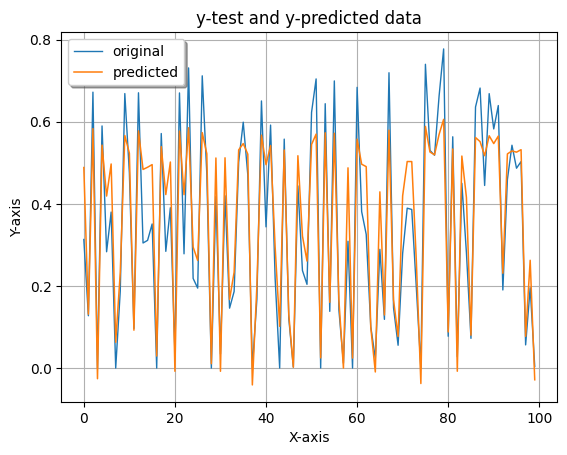

In [58]:

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
